In [1]:
# Importing our libraries needed

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
# This is our data

Weight = [0.5, 2.3, 2.9]
Height = [1.4, 1.9, 3.2]

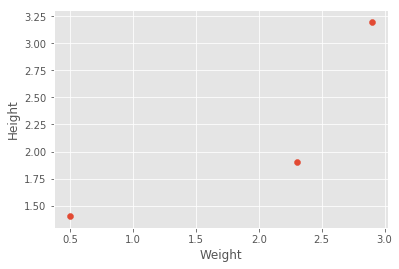

In [3]:
# Some Visuaization

plt.scatter(Weight, Height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [4]:
# This function is very useful for us
# Try to read it and you'll probably understand it

def SumOfSquaredResiduals(intercept, slope, height, weight):
    Residuals_Squared = []
    Residuals = []
    Predicted_Heights = []
    for x, y in zip(height, weight):
        Predicted_Height = intercept + slope * y
        Predicted_Heights.append(Predicted_Height)
        Residual = x - Predicted_Height
        Residuals.append(Residual)
        Residual_Squared = Residual ** 2
        Residuals_Squared.append(Residual_Squared)
            
    return sum(Residuals_Squared), Predicted_Heights

In [5]:
#SOSR stands for SumOfSquaredResiduals and PR for PredictedHeight
#Let's take 0.64 as a slope

SumsOfSquaredResiduals = []
intercepts = list(np.arange(0, 2, 0.1))
for i in intercepts:
    SOSR, PR = SumOfSquaredResiduals(i, 0.64, Height, Weight)
    SumsOfSquaredResiduals.append(SOSR)
    
    if i == max(intercepts):
        break

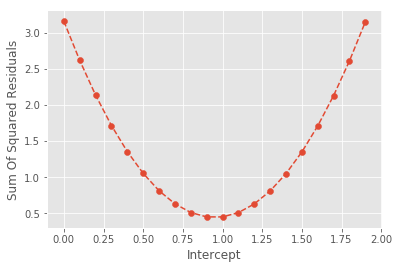

In [6]:
# Some visualization between Sum Of Squared Residuals and the intecept

plt.clf()
plt.scatter(intercepts, SumsOfSquaredResiduals)
plt.plot(intercepts, SumsOfSquaredResiduals, '--')
plt.xlabel('Intercept')
plt.ylabel('Sum Of Squared Residuals')
plt.show()

In [7]:
# Now we need to calculate the derivative of each function (Height - (intercept + slope * Weight))**2
#                            and which is -2(Height - (intercept + slope * Weight))

In [8]:
# This function is used to determine the best intercept after some operations

def BestIntercept(Height, Weight, q=0):
    lr = 0.1
    derv_with_each_inter = []
    for h, w in zip(Height, Weight):
        func = h - (q + 0.64 * w)
        func *= -2
        derv_with_each_inter.append(func)
        z = q - (sum(derv_with_each_inter) * lr)
    return z

In [9]:
# Some operations

z = BestIntercept(Height, Weight)
intercepts = [z]
for i in range(10):
    z = BestIntercept(Height, Weight, z)
    intercepts.append(z)
intercepts[10]

0.9506267928166401

In [10]:
# The best intercept that fits well our data is 0.95
intercept = intercepts[10]

regression_line = [intercept + 0.64 * x for x in Weight]

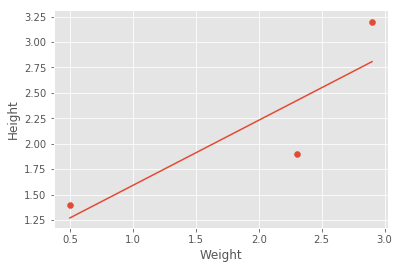

In [11]:
# Some visualization for the regression_line

plt.scatter(Weight, Height)
plt.plot(Weight, regression_line)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()